In [1]:
import numpy as np 
import pandas as pd 
import nltk

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.shape

(5728, 2)

In [5]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(5695, 2)

In [8]:
df.dtypes

text    object
spam     int64
dtype: object

In [9]:
import re
import string
import math

In [10]:
df['count']= df['text'].str.split().str.len()

In [11]:
df

,text,spam,count
0,Subject: naturally irresistible your corporate...,1,324
1,Subject: the stock trading gunslinger fanny i...,1,89
2,Subject: unbelievable new homes made easy im ...,1,87
3,Subject: 4 color printing special request add...,1,98
4,"Subject: do not have money , get software cds ...",1,52
...,...,...,...
5723,Subject: re : research and development charges...,0,297
5724,"Subject: re : receipts from visit jim , than...",0,244
5725,Subject: re : enron case study update wow ! a...,0,515
5726,"Subject: re : interest david , please , call...",0,276


In [12]:
# Lower Case

df["text"] = df["text"].str.lower()
df.head()

,text,spam,count
0,subject: naturally irresistible your corporate...,1,324
1,subject: the stock trading gunslinger fanny i...,1,89
2,subject: unbelievable new homes made easy im ...,1,87
3,subject: 4 color printing special request add...,1,98
4,"subject: do not have money , get software cds ...",1,52


In [13]:
# Removing Punctuations

Punctuations = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', Punctuations))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,text,spam,count
0,subject naturally irresistible your corporate ...,1,324
1,subject the stock trading gunslinger fanny is...,1,89
2,subject unbelievable new homes made easy im w...,1,87
3,subject 4 color printing special request addi...,1,98
4,subject do not have money get software cds fr...,1,52


In [14]:
# StopWords
from nltk.corpus import stopwords

In [15]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [16]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text"] = df["text"].apply(lambda text: remove_stopwords(text))
df.head()

,text,spam,count
0,subject naturally irresistible corporate ident...,1,324
1,subject stock trading gunslinger fanny merrill...,1,89
2,subject unbelievable new homes made easy im wa...,1,87
3,subject 4 color printing special request addit...,1,98
4,subject money get software cds software compat...,1,52


In [17]:
# It is always better to remove frequent words:

from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('enron', 13329),
 ('ect', 11411),
 ('subject', 10119),
 ('vince', 8469),
 ('hou', 5575),
 ('com', 5395),
 ('2000', 4964),
 ('please', 4913),
 ('kaminski', 4723),
 ('would', 4399)]

In [18]:
Frequent = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in Frequent])

df["text"] = df["text"].apply(lambda text: remove_freqwords(text))
df.head()

,text,spam,count
0,naturally irresistible corporate identity lt r...,1,324
1,stock trading gunslinger fanny merrill muzo co...,1,89
2,unbelievable new homes made easy im wanting sh...,1,87
3,4 color printing special request additional in...,1,98
4,money get software cds software compatibility ...,1,52


In [19]:
# Lemmatization:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text"] = df["text"].apply(lambda text: lemmatize_words(text))
df.head()

,text,spam,count
0,naturally irresistible corporate identity lt r...,1,324
1,stock trading gunslinger fanny merrill muzo co...,1,89
2,unbelievable new home made easy im wanting sho...,1,87
3,4 color printing special request additional in...,1,98
4,money get software cd software compatibility g...,1,52


## Exploring Text Data

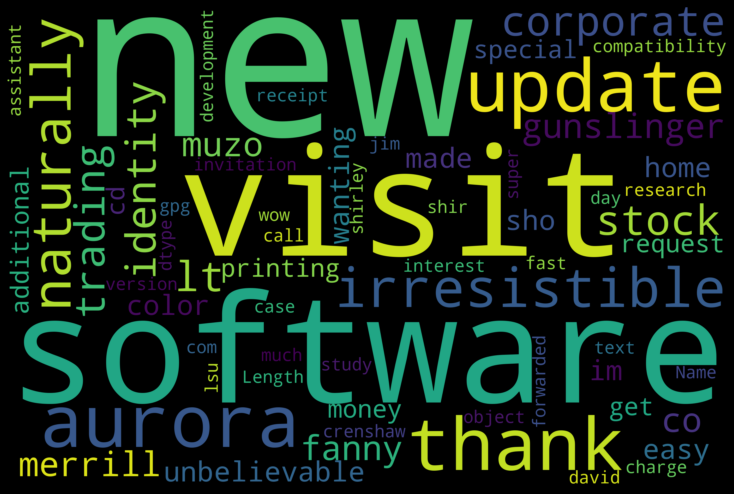

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df['text']))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
# !pip install stop-words
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words

In [23]:
def tokenz(x):
    spams = ' '.join(x).lower()
    spams = re.sub('[^a-z]+', ' ', spams)
    spams = nltk.word_tokenize(spams)
    spams = [i for i in spams if len(i) > 1]

    stop_words = list(get_stop_words('en'))
    spams_tokenize = [word for word in spams if word not in stop_words]
    spams_tokenize = ' '.join(spams_tokenize)
    return spams_tokenize

spam_words = tokenz(df[df.spam == 1].text)
ham_words = tokenz(df[df.spam == 0].text)

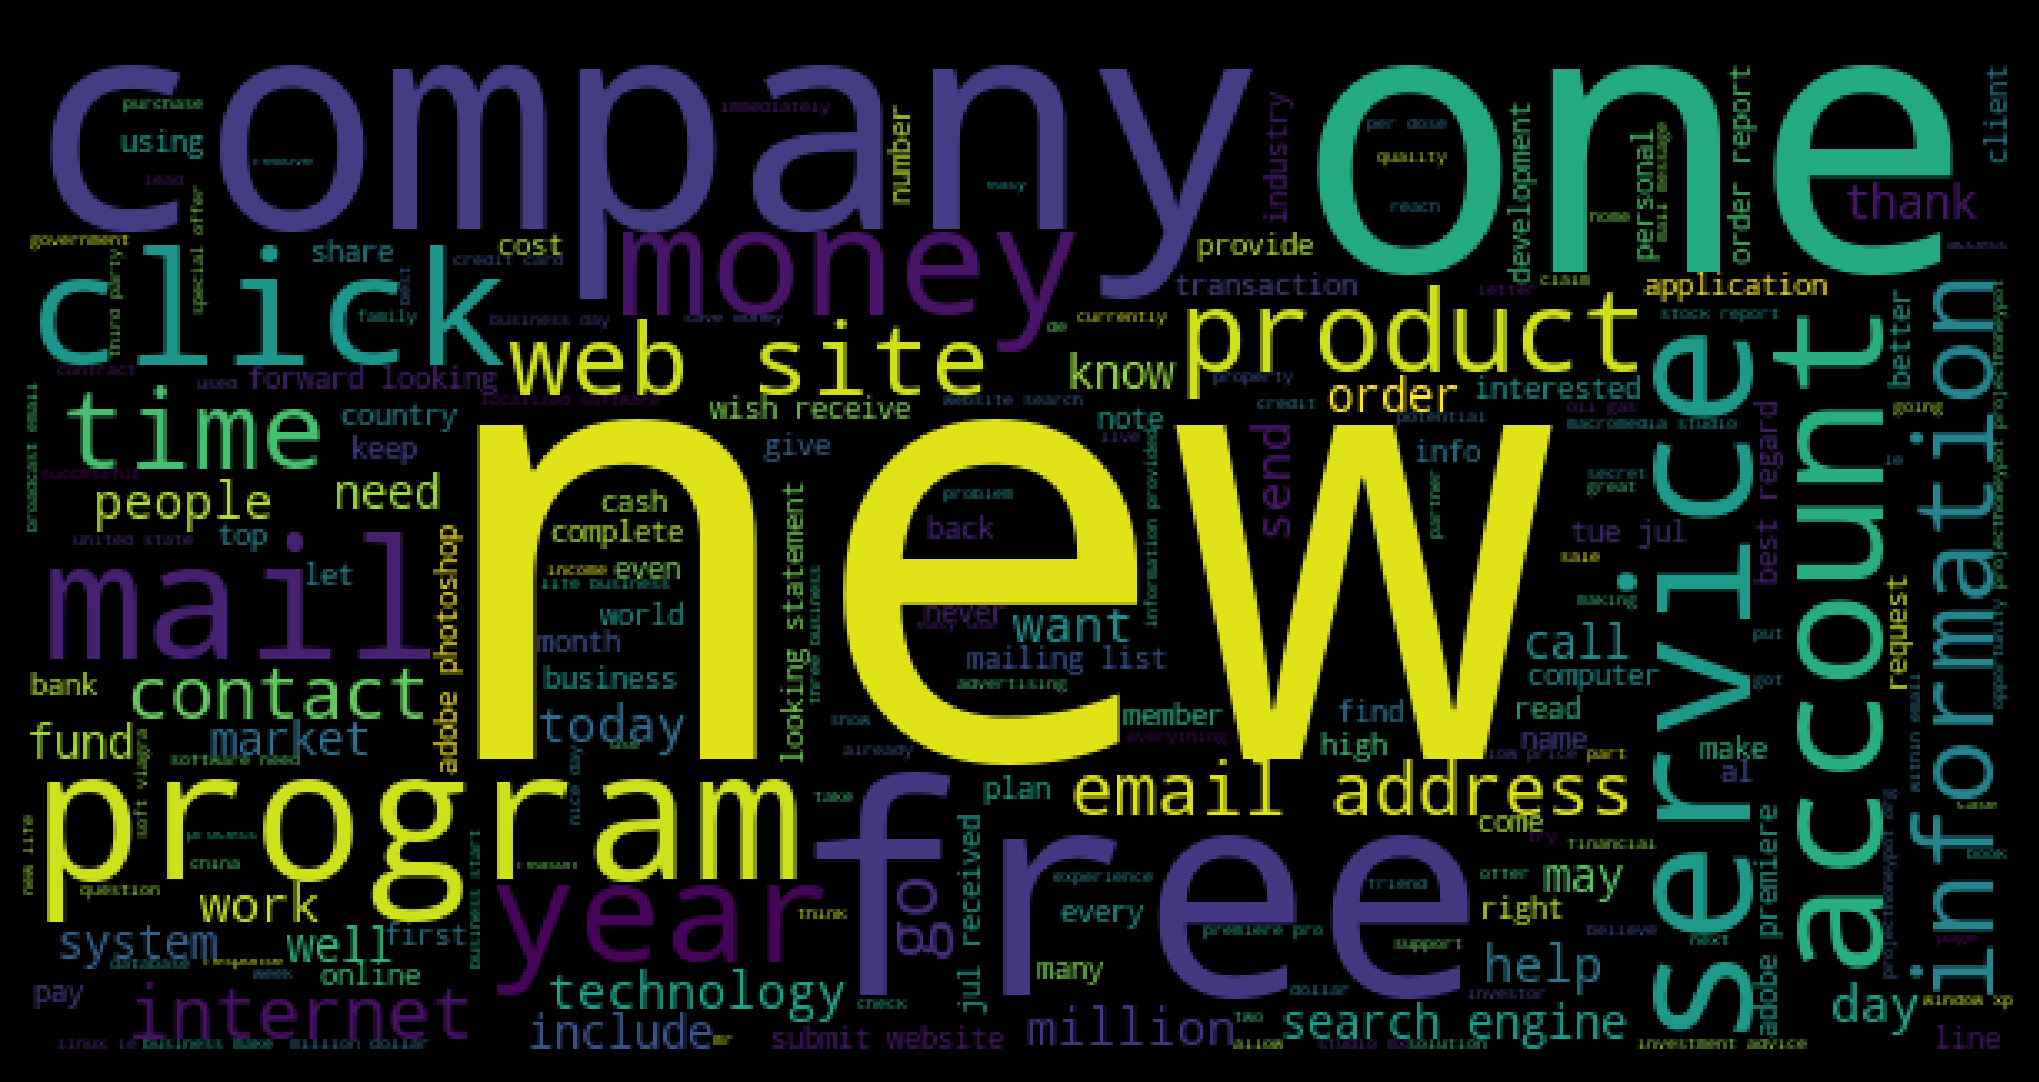

In [24]:
wc = WordCloud(width=600,height=300)

cld = wc.generate(spam_words)
plt.figure(figsize=(10,5), dpi=200, facecolor='k')
plt.imshow(cld)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WordCloud for Spam message')
plt.show()

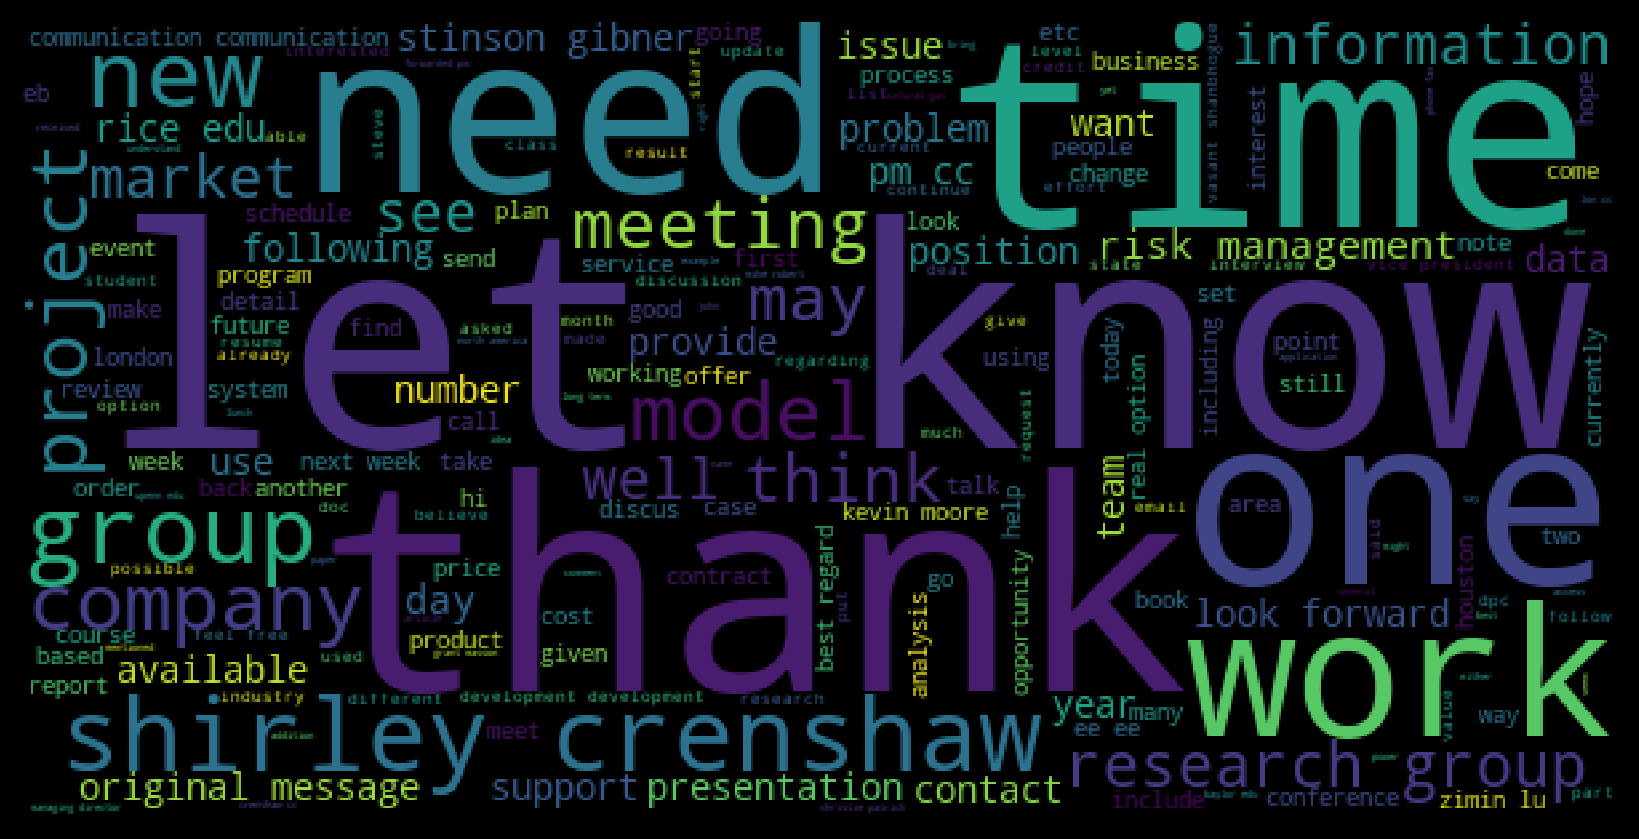

In [25]:
cld = wc.generate(ham_words)

plt.figure(figsize=(8,4), dpi=200, facecolor='k')
plt.imshow(cld)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Plot High frequency Words

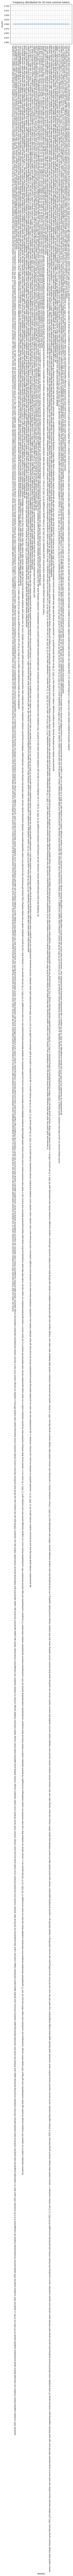

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist

fdist_filtered = FreqDist(df['text'])
fdist_filtered.plot(30,title='Frequency distribution for 30 most common tokens')

# Now let's convert text to features:


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vectorizer = CountVectorizer()

In [29]:
df1 = df

In [30]:
vectorizer.fit(df1['text'])

CountVectorizer()

In [31]:
vector = vectorizer.transform(df1['text'])

In [32]:
print(vectorizer.vocabulary_)
print(vector.toarray())

{'naturally': 21785, 'irresistible': 17554, 'corporate': 9501, 'identity': 16499, 'lt': 19716, 'really': 26040, 'hard': 15552, 'recollect': 26156, 'company': 8809, 'market': 20199, 'full': 14397, 'suqgestions': 30256, 'information': 17006, 'isoverwhelminq': 17598, 'good': 15012, 'catchy': 7681, 'logo': 19541, 'stylish': 29999, 'statlonery': 29680, 'outstanding': 23162, 'website': 33432, 'make': 19994, 'task': 30665, 'much': 21472, 'easier': 11837, 'promise': 25219, 'havinq': 15652, 'ordered': 22950, 'iogo': 17478, 'automaticaily': 5594, 'become': 6085, 'world': 33926, 'ieader': 16516, 'isguite': 17578, 'ciear': 8247, 'without': 33809, 'product': 25127, 'effective': 12026, 'business': 7220, 'organization': 22985, 'practicable': 24759, 'aim': 4280, 'hotat': 16197, 'nowadays': 22358, 'marketing': 20206, 'effort': 12039, 'list': 19398, 'clear': 8405, 'benefit': 6202, 'creativeness': 9711, 'hand': 15482, 'made': 19866, 'original': 23006, 'specially': 29298, 'done': 11409, 'reflect': 26298, 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
# pip install -U scikit-learn

In [38]:
# Train test split

import numpy as np
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(df['text'],df['spam'])

In [42]:
# Encoding the text data

from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [44]:
# Using tfidf vectorizer:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)

In [45]:
tfidf_vect.fit(df['text'])

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')

In [46]:
xtrain_tfidf = tfidf_vect.transform(x_train)
xvalid_tfidf = tfidf_vect.transform(x_test)

## Model 1: Logistic Regression:

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression().fit(xtrain_tfidf, y_train)

In [55]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf), y_test)
print ("Accuracy: ", accuracy)

Accuracy:  0.973314606741573


In [59]:
print(metrics.classification_report(y_test, model.predict(xvalid_tfidf)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1094
           1       0.97      0.91      0.94       330

    accuracy                           0.97      1424
   macro avg       0.97      0.95      0.96      1424
weighted avg       0.97      0.97      0.97      1424



In [61]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, model.predict(xvalid_tfidf))

In [64]:
conf_mat

array([[1086,    8],
       [  30,  300]], dtype=int64)

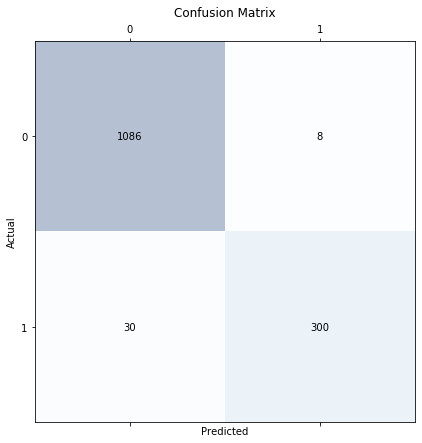

In [66]:

fig,ax=plt.subplots(figsize=(10,7))
ax.matshow(conf_mat,cmap=plt.cm.Blues,alpha=.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [71]:
# Naive Bayes Model:

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(xtrain_tfidf, y_train)

In [72]:
accuracy = metrics.accuracy_score(spam_detect_model.predict(xvalid_tfidf), y_test)
print ("Accuracy: ", accuracy)

Accuracy:  0.9789325842696629


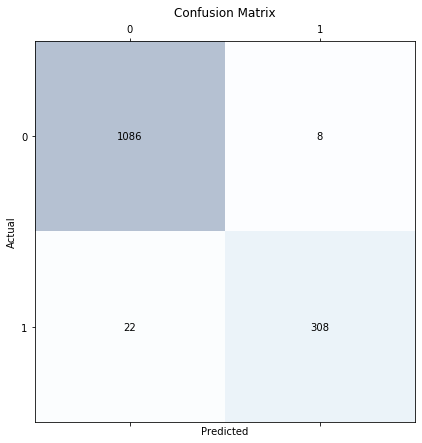

In [73]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, spam_detect_model.predict(xvalid_tfidf))


fig,ax=plt.subplots(figsize=(10,7))
ax.matshow(conf_mat,cmap=plt.cm.Blues,alpha=.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [74]:
# Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier

In [75]:
decision_tree = DecisionTreeClassifier().fit(xtrain_tfidf, y_train)

In [76]:
accuracy = metrics.accuracy_score(decision_tree.predict(xvalid_tfidf), y_test)
print ("Accuracy: ", accuracy)

Accuracy:  0.9346910112359551


In [77]:
# SUPPORT VECTOR MACHINES:

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(xtrain_tfidf, y_train)

SVC()

In [78]:
y_pred = svclassifier.predict(xvalid_tfidf)

In [79]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.985252808988764


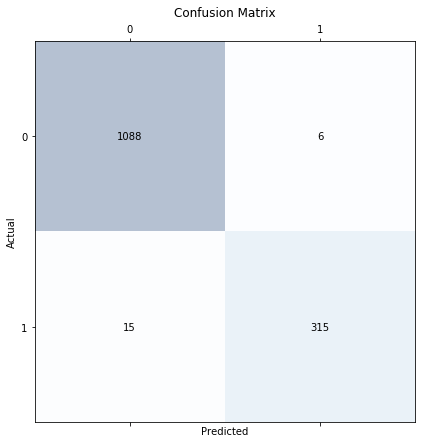

In [80]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)


fig,ax=plt.subplots(figsize=(10,7))
ax.matshow(conf_mat,cmap=plt.cm.Blues,alpha=.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()